In [5]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
seed = 1234
np.random.seed(seed)

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [92]:
print(X_train.shape)

(50000, 32, 32, 3)


Split the whole training group into two groups - train group and validation group. 

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=seed, shuffle=True)



In [94]:
# check the shape of training group. 
print(X_train.shape)

(40000, 32, 32, 3)


In [8]:
# reshape all the X sets for the model. 
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [96]:
# check the shape of new training set
print(X_train.shape)

(40000, 3072)


In [9]:
# use the StandadScaler to transform the data set. 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [117]:
# train the KNN model with different k to see which one is the best
n = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
accu = []
for x in n:
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train, y_train)
    valid_predict = knn.predict(X_valid)
    accu.append(accuracy_score(valid_predict, y_valid))

best one: 10


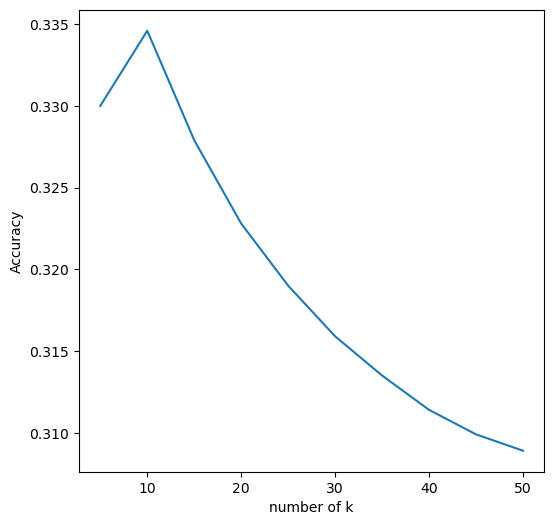

In [105]:
# use the result of validation group to find the best k for the model 
import matplotlib.pyplot as plt
n = np.array(n)
accu = np.array(accu)
figures, axes = plt.subplots(1, figsize = (6,6))
plt.plot(n, accu)
axes.set_xlabel("number of k")
axes.set_ylabel("Accuracy")
print("best one:", n[np.argmax(accu)])

In [106]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
test_predict = knn.predict(X_test)
print(accuracy_score(test_predict, y_test))

0.3336


In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
x = confusion_matrix(y_test, test_predict)

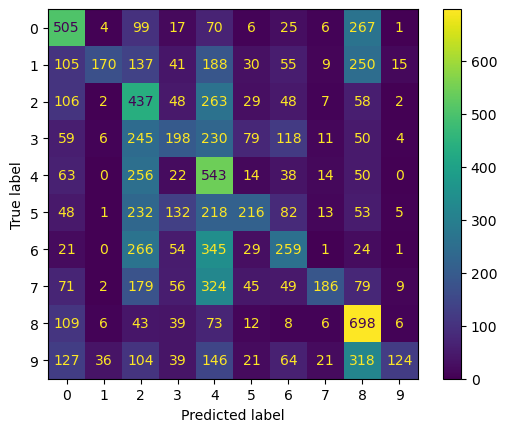

In [116]:
display = ConfusionMatrixDisplay(x)
display.plot()

Conclusion: The best k to fit the model for Cifar-10 is 10. However, the accuracy score is only 0.3336 which is low. By looking at this confusion matrix, we can see that the result is not satisfactory. Hence, we conclude that KNN is not a good model for image classification. 